# Task 3: Plot the 10 highest munros in a bar chart (Hard)

- You should use the dataset provided in data/Munros.csv
- The Munros are NOT in order. You should sort them by height in metres.
- Make sure each bar and both axes are properly labeled

In [1]:
#Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:

#Begin by loading the raw data into a dataframe
raw_data = pd.read_csv("data/Munros.csv")

#Now we sort by hieght
raw_data = raw_data.sort_values("Metres", ascending = False)
raw_data


,Date,Close,Volume
0,1/1/2020,"2,298.00",0
1,10/1/2019,"2,298.00","24,970,606"
2,7/1/2019,"2,090.00","21,377,340"
3,4/1/2019,"2,298.00","18,316,510"
4,1/2/2019,"1,839.00","32,059,019"
5,10/1/2018,"1,266.00","24,914,544"
6,7/2/2018,"1,055.00","19,180,883"
7,4/3/2018,995.5,"30,093,087"
8,1/2/2018,"1,229.00","20,674,033"
9,10/2/2017,"1,399.00","14,586,488"


In [13]:
#Ben Nevis is the tallest Munro in Scotland, so we've done this correctly!
#Now we need to isolate the information we care about, name and height(metres)

df = raw_data[["Name", "Metres"]]
df

,Name,Metres
6963,Ben Nevis [Beinn Nibheis],1344.53
5596,Ben Macdui [Beinn Macduibh],1309.00
5566,Braeriach,1296.00
5575,Ben Macdui North Top,1295.00
5673,Cairn Toul,1291.00
...,...,...
19209,Colne Bar,3.00
19570,Foulness Island,3.00
19642,Havengore Island,2.30
19623,New England Island,2.00


In [14]:
#head() automatically takes the top 5 results of the dataframe. To take more, we specify a number.
df = df.head(10)
df

,Name,Metres
6963,Ben Nevis [Beinn Nibheis],1344.53
5596,Ben Macdui [Beinn Macduibh],1309.00
5566,Braeriach,1296.00
5575,Ben Macdui North Top,1295.00
5673,Cairn Toul,1291.00
5634,Carn na Criche,1265.00
5654,Sgor an Lochain Uaine,1258.00
5623,Stob Coire Sputan Dearg,1249.00
5352,Cairn Gorm,1244.80
5573,Stob Coire an Lochain,1235.00


Now we just need some x-values. These will tell pyplot where to graph the bars. Since we just want the bars to go one-after-the-other, we use a range() function. range(1,11) will give us a list of number numbers from 1 to 10 (stopping before 11).

In [21]:
x = range(1,11)
y = df["Metres"]
labels = df["Name"]


And that's all the data we need! Now we just have to plot it.

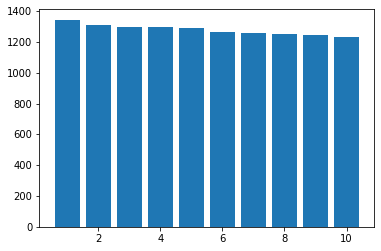

In [26]:
fig, ax = plt.subplots()

ax.bar(x, y)

plt.show()

This looks great! Except it doesn't. There are a few big problems:
- The axes aren't labeled, and there's no title. 
- The ticks on the X axis don't tell us which bar correspond to which Munro
- The range of the y axis is 0-1400, so it doesn't show much difference between the tallest and 10th tallest Munro.

Let's see what we can do about these.

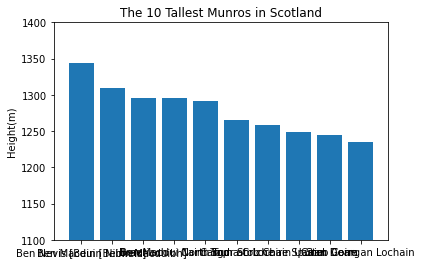

In [27]:
fig, ax = plt.subplots()

ax.bar(x, y)

#Let's set some boundaries and a label for the y axis
ax.set_ylim([1100,1400])
ax.set_ylabel('Height(m)')

#Now let's give each bar its corresponding label
ax.set_xticks(x)
ax.set_xticklabels(labels)

#Finally, let's give it a title
ax.set_title('The 10 Tallest Munros in Scotland')

plt.show()

This is much better! If we had shorter labels, this would be fine. But we want to add on the following:
- We want to be able to read the labels
- We want to see the exact values of the heights
- We want to be able to save the graph to a file. You could just take a screenshot, but this is easier.

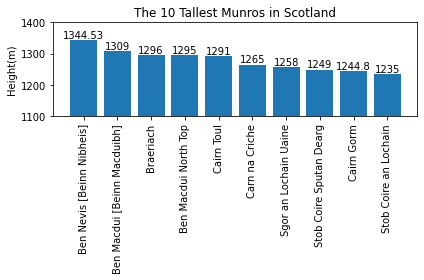

In [35]:
fig, ax = plt.subplots()

#In order to add labels, we need to save the bars to a variable
bars = ax.bar(x, y)

#Same as before, but we'll add the bar labels
ax.set_ylim([1100,1400])
ax.set_ylabel('Height(m)')
ax.bar_label(bars)

#This time we'll specify a "rotation"
plt.xticks(x, labels, rotation='vertical')

ax.set_title('The 10 Tallest Munros in Scotland')

#Cleans up the layout and makes the graph more readable
fig.tight_layout()

plt.savefig("munro_bar.png")

plt.show()


And we're sorted! You can see this graph in the same directory as this notebook